In [8]:
import tensorflow as tf
import cv2
tf.reset_default_graph()

from Model import Model, DecoderType
from SamplePreprocessor import preprocess
import sys
import argparse
import cv2
import editdistance
from DataLoader import DataLoader, Batch

decoderType = 'wordbeamsearch'



decoderType = DecoderType.BestPath
if 'beamsearch':
    decoderType = DecoderType.BeamSearch
if 'wordbeamsearch':
    decoderType = DecoderType.WordBeamSearch
        
        
class FilePaths:
	"filenames and paths to data"
	fnCharList = '../model/charList.txt'
	fnAccuracy = '../model/accuracy.txt'
	fnTrain = '../data/'
	fnInfer = '../data/test.png'
	fnCorpus = '../data/corpus.txt'

model = Model(open(FilePaths.fnCharList).read(), decoderType, mustRestore=True)

def infer(model, fnImg):
	"recognize text in image provided by file path"
	img = preprocess(cv2.imread(fnImg, cv2.IMREAD_GRAYSCALE), Model.imgSize)
	batch = Batch(None, [img])
	(recognized, probability) = model.inferBatch(batch, True)
	print('Recognized:', '"' + recognized[0] + '"')
	print('Probability:', probability[0])
    
    

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
Tensorflow: 1.12.0
Init with stored values from ../model/snapshot-38
INFO:tensorflow:Restoring parameters from ../model/snapshot-38


In [2]:
ls 

analyze.py          main.py       SamplePreprocessor.py
CTCWordBeamSearch/  Model.py      testing.ipynb
DataLoader.py       __pycache__/  TFWordBeamSearch.so


In [11]:
%%bash

git clone https://github.com/githubharald/CTCWordBeamSearch.git
cd CTCWordBeamSearch/cpp/proj/

NUMTHREADS="4"
echo "Parallel decoding with $NUMTHREADS threads"
PARALLEL="-DWBS_PARALLEL -DWBS_THREADS=$NUMTHREADS"

# get and print TF version
TF_VERSION=$(python3 -c "import tensorflow as tf ;  print(tf.__version__)")
echo "Your TF version is $TF_VERSION"
TF_CFLAGS=( $(python3 -c 'import tensorflow as tf; print(" ".join(tf.sysconfig.get_compile_flags()))') )
TF_LFLAGS=( $(python3 -c 'import tensorflow as tf; print(" ".join(tf.sysconfig.get_link_flags()))') )


g++ -Wall -O2 --std=c++11 -shared -o TFWordBeamSearch.so ../src/TFWordBeamSearch.cpp ../src/main.cpp ../src/WordBeamSearch.cpp ../src/PrefixTree.cpp ../src/Metrics.cpp ../src/MatrixCSV.cpp ../src/LanguageModel.cpp ../src/DataLoader.cpp ../src/Beam.cpp -fPIC ${TF_CFLAGS[@]} ${TF_LFLAGS[@]} $PARALLEL


cp CTCWordBeamSearch/cpp/proj/TFWordBeamSearch.so .

# need to unzip model 

Parallel decoding with 4 threads
Your TF version is 1.12.0


Cloning into 'CTCWordBeamSearch'...


In [16]:
%%bash
cp CTCWordBeamSearch/cpp/proj/TFWordBeamSearch.so .

In [4]:
ls ../data/test.png

analyze.png   Get IAM training data.txt  translationInvariance.npy
checkDirs.py  pixelRelevance.npy         translationInvarianceTexts.pickle
corpus.txt    test.png                   words.txt


In [9]:
infer(model, '../data/test.png')

Recognized: "little"
Probability: 0.96625495


In [17]:
from glob import glob

for f in glob('../data/words/a03/a03-009/*'):

    infer(model, f)

Recognized: "an"
Probability: 0.98047525
Recognized: "difficult"
Probability: 0.59630936
Recognized: "and"
Probability: 0.9646121
Recognized: "also"
Probability: 0.33708933
Recognized: "it"
Probability: 0.7752454
Recognized: "idea"
Probability: 0.09965921
Recognized: "such"
Probability: 0.56423956
Recognized: "the"
Probability: 0.785784
Recognized: "hug0slav"
Probability: 1.1656747e-06
Recognized: "Pity"
Probability: 1.8623157e-05
Recognized: "Casablanca"
Probability: 0.031954046
Recognized: ","
Probability: 0.85637933
Recognized: "world"
Probability: 0.8171616
Recognized: "on"
Probability: 0.88122934
Recognized: "uncommitted"
Probability: 0.5107472
Recognized: "extended"
Probability: 0.72222257
Recognized: "some"
Probability: 0.9320382
Recognized: "inter-African"
Probability: 0.19575293
Recognized: "The"
Probability: 0.60978365
Recognized: "is"
Probability: 0.7850034
Recognized: "in"
Probability: 0.9936187
Recognized: "the"
Probability: 0.9169054
Recognized: "and"
Probability: 0.90383

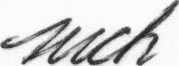

In [14]:
from PIL import Image

Image.open('../data/words/a03/a03-009/a03-009-06-04.png')

In [6]:
!pip install editdistance, opencv-python tensorflow torch torchtext

    100% |████████████████████████████████| 174kB 11.2MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd

word_level_train = pd.read_csv('../../../../../data/preprocessed/word_level_train.csv')
word_level_test = pd.read_csv('../../../../../data/preprocessed/word_level_test.csv')
data_path = '../../../../../data/raw/word_level'

In [2]:
word_level_train.head()

,index,filename,folder,document,token,image_name,pos_tag,image_path
0,860,e04-011,e04,e04-011,complete,e04-011-07-06,VB,../../data/raw/word_level/e04/e04-011/e04-011-...
1,1070,b06-036,b06,b06-036,must,b06-036-01-02,MD,../../data/raw/word_level/b06/b06-036/b06-036-...
2,1158,e07-101,e07,e07-101,is,e07-101-00-06,BEZ,../../data/raw/word_level/e07/e07-101/e07-101-...
3,1188,h07-075,h07,h07-075,for,h07-075-06-01,IN,../../data/raw/word_level/h07/h07-075/h07-075-...
4,1041,g02-073,g02,g02-073,produce,g02-073-03-04,VB,../../data/raw/word_level/g02/g02-073/g02-073-...


In [56]:
from __future__ import division
from __future__ import print_function

import os
import random
import numpy as np
import cv2
from SamplePreprocessor import preprocess
# from models.OCRBeamSearch.src.SamplePreprocessor import preprocess


chars = [' ', '!', '"', '#', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


def new_word_level_df(word_level_df, data_path):
    word_level_df['image_path'] = word_level_df['image_path'].map(lambda x: 
                                                    data_path + x.split('word_level')[-1])
    return word_level_df

def create_samples(word_level_df):
    samples = []
    for path, word in zip(word_level_df.image_path, word_level_df.token):
        samples.append(Sample(word, path))
    return samples


class Sample:
	"sample from the dataset"
	def __init__(self, gtText, filePath):
		self.gtText = gtText
		self.filePath = filePath


class Batch:
	"batch containing images and ground truth texts"
	def __init__(self, gtTexts, imgs):
		self.imgs = np.stack(imgs, axis=0)
		self.gtTexts = gtTexts


class DataLoader:
    "loads data which corresponds to IAM format, see: http://www.fki.inf.unibe.ch/databases/iam-handwriting-database" 

#     def __init__(self, filePath, batchSize, imgSize, maxTextLen):
    def __init__(self, data_path, word_level_train, word_level_test, batchSize, imgSize, maxTextLen):
        "loader for dataset at given location, preprocess images and text according to parameters"

# 		assert filePath[-1]=='/'

# 		self.dataAugmentation = False
# 		self.currIdx = 0
# 		self.batchSize = batchSize
# 		self.imgSize = imgSize
# 		self.samples = []
	
# 		f=open('../data/'+'words.txt')
# 		chars = set()
# 		bad_samples = []
# 		bad_samples_reference = ['a01-117-05-02.png', 'r06-022-03-05.png']
# 		for line in f:
# 			# ignore comment line
# 			if not line or line[0]=='#':
# 				continue
# # 			print(len(line.strip().split(' ')))
# 			lineSplit = line.strip().split(' ')
# # 			assert len(lineSplit) >= 9
			
# 			# filename: part1-part2-part3 --> part1/part1-part2/part1-part2-part3.png
# 			fileNameSplit = lineSplit[0].split('-')
# 			fileName = filePath + fileNameSplit[0] + '/' + fileNameSplit[0] + '-' + fileNameSplit[1] + '/' + lineSplit[0] + '.png'

# 			# GT text are columns starting at 9
# 			gtText = self.truncateLabel(' '.join(lineSplit[8:]), maxTextLen)
# 			chars = chars.union(set(list(gtText)))

# 			# check if image is not empty
# 			if not os.path.getsize(fileName):
# 				bad_samples.append(lineSplit[0] + '.png')
# 				continue

# 			# put sample into list
# 			self.samples.append(Sample(gtText, fileName))

# 		# some images in the IAM dataset are known to be damaged, don't show warning for them
# 		if set(bad_samples) != set(bad_samples_reference):
# 			print("Warning, damaged images found:", bad_samples)
# 			print("Damaged images expected:", bad_samples_reference)

# 		# split into training and validation set: 95% - 5%
# 		splitIdx = int(0.95 * len(self.samples))
# 		self.trainSamples = self.samples[:splitIdx]
# 		self.validationSamples = self.samples[splitIdx:]
        word_level_train = new_word_level_df(word_level_train, data_path)
        #Drop two bad rows
        word_level_train.drop([52114, 87331], axis=0, inplace=True)
        word_level_test = new_word_level_df(word_level_test, data_path)

        self.trainSamples = create_samples(word_level_train)
        self.validationSamples = create_samples(word_level_test)
        
        # put words into lists
        self.trainWords = [x.gtText for x in self.trainSamples]
        self.validationWords = [x.gtText for x in self.validationSamples]

        # number of randomly chosen samples per epoch for training 
        self.numTrainSamplesPerEpoch = 25000 
        
        # start with train set
        self.trainSet()

        # list of all chars in dataset
        self.charList = sorted(list(chars))


    def truncateLabel(self, text, maxTextLen):
        # ctc_loss can't compute loss if it cannot find a mapping between text label and input 
        # labels. Repeat letters cost double because of the blank symbol needing to be inserted.
        # If a too-long label is provided, ctc_loss returns an infinite gradient
        cost = 0
        for i in range(len(text)):
            if i != 0 and text[i] == text[i-1]:
                cost += 2
            else:
                cost += 1
            if cost > maxTextLen:
                return text[:i]
        return text


    def trainSet(self):
        "switch to randomly chosen subset of training set"
        self.dataAugmentation = True
        self.currIdx = 0
        random.shuffle(self.trainSamples)
        self.samples = self.trainSamples[:self.numTrainSamplesPerEpoch]

    
    def validationSet(self):
        "switch to validation set"
        self.dataAugmentation = False
        self.currIdx = 0
        self.samples = self.validationSamples


    def getIteratorInfo(self):
        "current batch index and overall number of batches"
        return (self.currIdx // self.batchSize + 1, len(self.samples) // self.batchSize)


    def hasNext(self):
        "iterator"
        return self.currIdx + self.batchSize <= len(self.samples)


    def getNext(self):
        "iterator"
        batchRange = range(self.currIdx, self.currIdx + self.batchSize)
        gtTexts = [self.samples[i].gtText for i in batchRange]
        imgs = [preprocess(cv2.imread(self.samples[i].filePath, cv2.IMREAD_GRAYSCALE), self.imgSize, self.dataAugmentation) for i in batchRange]
        self.currIdx += self.batchSize
        return Batch(gtTexts, imgs)




In [57]:
batchSize = 50
imgSize = (128, 32)
maxTextLen = 32

# loader = DataLoader(data_path+'/' + '/', 50, imgSize, maxTextLen)
new_loader = DataLoader(data_path, word_level_train, word_level_test, batchSize, imgSize, maxTextLen)

In [35]:
loader.samples[0].filePath, loader.samples[0].gtText

('../../../../../data/raw/word_level//a05/a05-017/a05-017-07-06.png', '.')

In [58]:
new_loader.samples[0].filePath, new_loader.samples[0].gtText

('../../../../../data/raw/word_level/m01/m01-160/m01-160-03-07.png', ',')

In [59]:
data_path

'../../../../../data/raw/word_level'

In [62]:
bad_samples_reference = ['a01-117-05-02.png', 'r06-022-03-05.png']

word_level_train[word_level_train.image_name == 'a01-117-05-02']

,index,filename,folder,document,token,image_name,pos_tag,image_path
52114,991,a01-117,a01,a01-117,Powell,a01-117-05-02,NP,../../../../../data/raw/word_level/a01/a01-117...


In [70]:
word_level_train[word_level_train.image_name == 'r06-022-03-05'].index[0]

87331

In [68]:
word_level_train.drop([52114, 87331], axis=0)

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

In [74]:
word_level_train[word_level_train.image_name == 'b06-082-08-05'].image_path.iloc[0]

'../../../../../data/raw/word_level/b06/b06-082/b06-082-08-05.png'

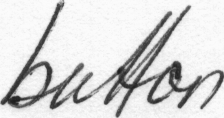

In [76]:
from PIL import Image

Image.open('../../../../../data/raw/word_level/b06/b06-082/b06-082-09-01.png')